# Fancy Indexing

 fancy indexing이라고하는 또 다른 배열 인덱싱 스타일을 살펴볼 것입니다. 멋진 인덱싱은 이미 살펴본 간단한 인덱싱과 비슷하지만 단일 스칼라 대신 인덱스 배열을 전달합니다. 
 
#### 이를 통해 배열 값의 복잡한 하위 집합에 매우 빠르게 액세스하고 수정할 수 있습니다.

## 1. Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


Suppose we want to access three different elements. We could do it like this:

In [3]:
[x[3], x[7], x[2]]

[71, 86, 14]


또는 동일한 결과를 얻으 려면 단일 목록이나 인덱스 배열을 전달할 수 있습니다.

In [7]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [6]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

Fancy indexing also works in multiple dimensions. Consider the following array:

In [8]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

Like with standard indexing, the first index refers to the row, and the second to the column:

In [9]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])


결과의 첫 번째 값은 X [0, 2]이고 두 번째 값은 X [1, 1]이고 세 번째 값은 X [2, 3]입니다. Fancy indexing 생성에서 indexing 의 쌍은 '배열에 대한 계산 : broadcasting'에 언급 된 모든 방송 규칙을 따릅니다. 예를 들어 인덱스 내에서 열 벡터와 행 벡터를 결합하면 2 차원 결과를 얻습니다

In [10]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [14]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])


여기서 각 행 값은 산술 연산 브로드 캐스팅에서 보았 듯이 각 열 벡터와 일치합니다. 예 :

In [15]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

It is always important to remember with fancy indexing that the return value reflects the broadcasted shape of the indices, rather than the shape of the array being indexed.

## 2. Combined Indexing


#### 훨씬 더 강력한 작업을 위해 고급 색인 생성을 우리가 보았던 다른 색인 작성 체계와 결합 할 수 있습니다.

In [18]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


#### We can combine fancy and simple indices:

In [17]:
X[2, [2, 0, 1]]

array([10,  8,  9])

#### And we can combine fancy indexing with masking:

In [19]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

#### All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

# 3. Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an **N** by **D** matrix representing **N** points in **D** dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [29]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape


(100, 2)

Using the plotting tools we will discuss in Introduction to Matplotlib, we can visualize these points as a scatter-plot:

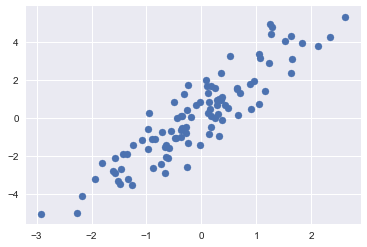

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # for plot styling

plt.scatter(X[:, 0], X[:, 1])

In [30]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([99, 59, 73, 16, 92, 63, 54, 83, 86, 22, 97, 71, 25,  9, 29, 12, 91,
        2,  3, 87])

In [31]:
selection = X[indices]  # fancy indexing here
selection.shape

(20, 2)

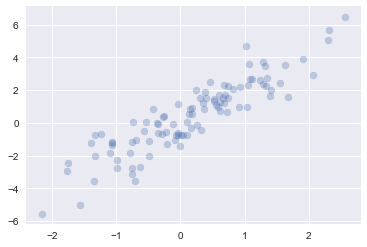

In [33]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);


이러한 종류의 전략은 통계 모델의 검증을 위해 **train / test** 분할 (하이퍼 매개 변수 및 모델 유효성 검증 참조) 및 통계적 질문에 응답하기위한 샘플링 방법에서 종종 필요 하듯이 데이터 세트를 빠르게 분할하는 데 자주 사용됩니다.

## 4. Modifying Values with Fancy Indexing

#### fancy indexing 을 사용하여 배열의 일부를 액세스하는 것처럼 배열의 일부를 수정할 수도 있습니다. 예를 들어 인덱스 배열이 있다고 가정하고 배열의 해당 항목을  값으로 설정하려고합니다.

In [35]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


#### 이를 위해 임의의 대입 연산자를 사용할 수 있습니다. 예 :

In [36]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]



#### 그러나 이러한 작업으로 반복되는 인덱스로 인해 예기치 않은 결과가 발생할 수 있습니다. 다음을 고려하세요:

In [40]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[ 6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]



#### **4** 어디로 갔습니까? 이 연산의 결과는 먼저 x [0] = 4와 x [0] = 6을 할당하는 것입니다. 결과는 물론 x [0]에 값 6이 포함됩니다.

In [42]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([ 6.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.])


#### x [3]에 값 2가 포함되고 x [4]에 값 3이 포함될 것으로 예상 할 수 있습니다. 이는 각 인덱스가 반복되는 횟수이기 때문입니다. 왜 이것이 사실이 아닌가? 개념적으로 이것은 x [i] + = 1은 x [i] = x [i] + 1의 축약어를 의미하기 때문입니다. x [i] + 1이 평가 된 다음 x의 인덱스에 결과가 할당됩니다. . 이 점을 염두에두고 여러 번 발생하는 기능 보강이 아니라 임무가 아니라 직관적이지 않은 결과를 초래합니다.

#### 그렇다면 작업이 반복되는 다른 동작을 원한다면 어떻게해야할까요? 이를 위해 ufuncs (NumPy 1.8부터 사용 가능)의 at () 메서드를 사용하고 다음을 수행 할 수 있습니다.

In [43]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[ 0.  0.  1.  2.  3.  0.  0.  0.  0.  0.]



#### at () 메서드는 지정된 값 (여기서는 1)을 사용하여 지정된 인덱스 (여기서는 i)에서 지정된 연산자의 내부 응용 프로그램을 수행합니다. 정신과 비슷한 또 다른 방법은 ufuncs의 reduceat () 메소드입니다.이 메소드는 NumPy 문서에서 읽을 수 있습니다.

## 5. Example: Binning Data

In [45]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

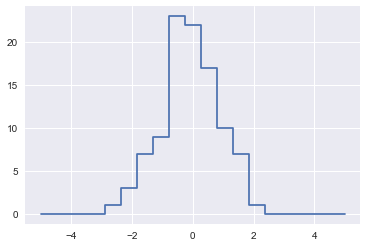

In [46]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

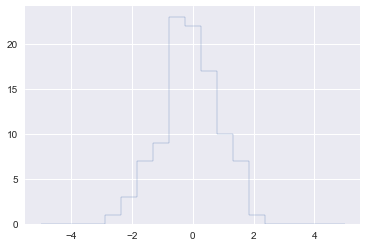

In [47]:
plt.hist(x, bins, histtype='step');

In [48]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
52.3 µs ± 4.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
13 µs ± 298 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
